In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/victor/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv")
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


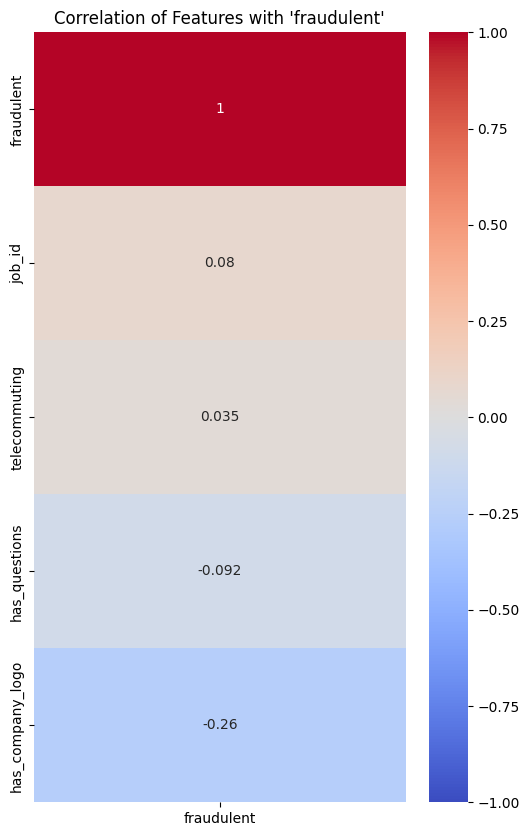

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

fraud_corr = corr_matrix[['fraudulent']].sort_values(by='fraudulent', ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(fraud_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with 'fraudulent'")
plt.show()


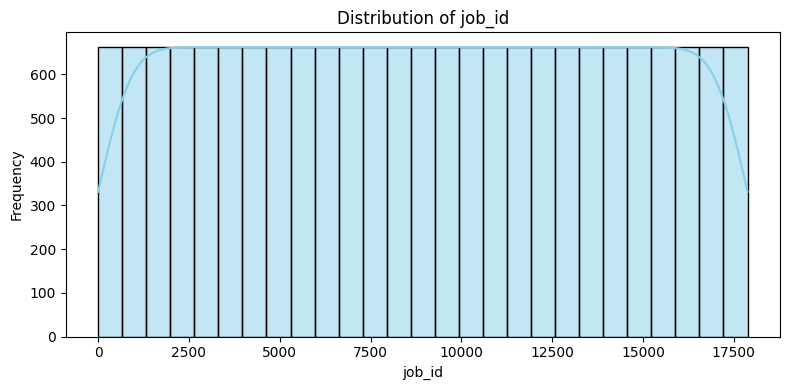

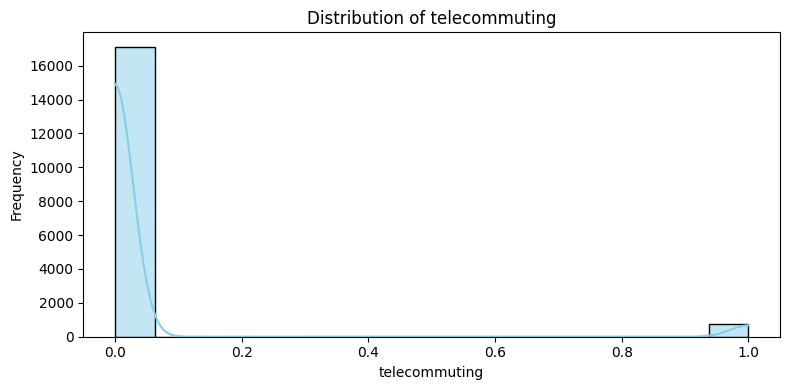

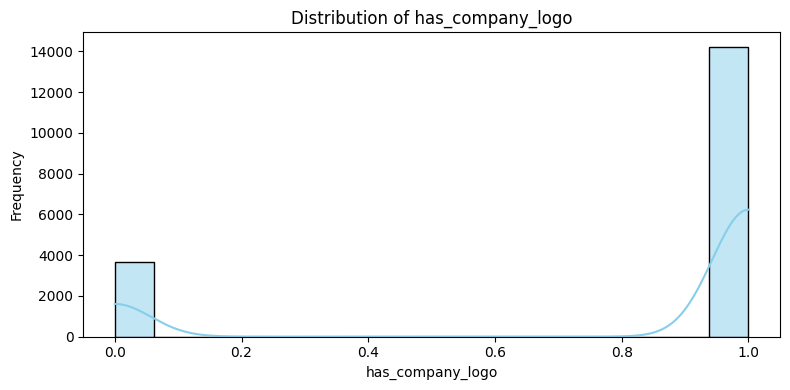

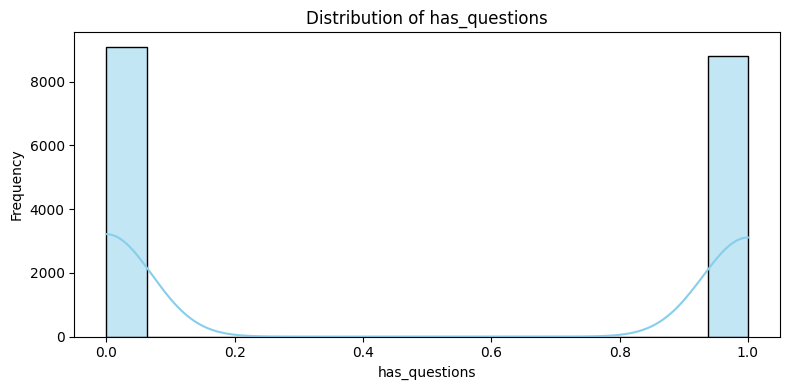

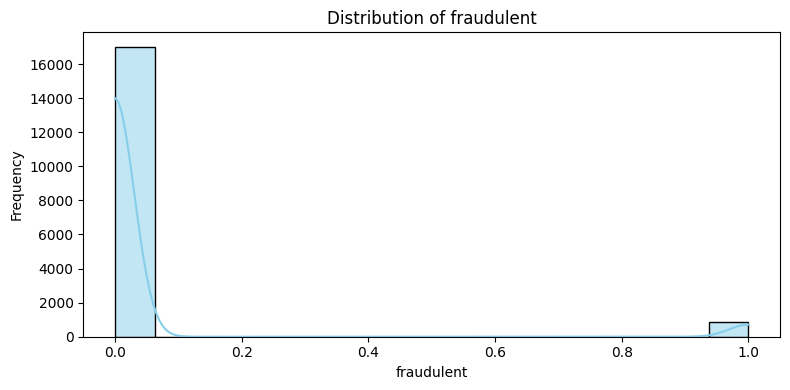

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


1. Cleaning Data

In [ ]:
df.drop(columns=['job_id', 'description'], inplace=True)

2. Missing Data Imputation: Identify and impute suitable missing values
appropriately

In [ ]:
print(df.isnull().sum())

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [ ]:
import numpy as np

def is_valid_salary_range(value):
    if pd.isna(value):
        return False

    parts = str(value).split('-')

    if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
        return True
    return False

df_clean = df.copy()
df_clean['salary_range'] = df_clean['salary_range'].replace('0-0', np.nan)

# Handling missing values
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)  # Fill categorical with mode
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')  # Convert to numeric if possible
        df_clean[col].fillna(df_clean[col].median(), inplace=True)    # Fill numeric with median
df_clean


<ipython-input-29-962600818c4e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)  # Fill categorical with mode
<ipython-input-29-962600818c4e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

,title,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,40000-50000,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,40000-50000,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,40000-50000,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,40000-50000,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,40000-50000,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,40000-50000,Vend is looking for some awesome new talent to...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,40000-50000,WebLinc is the e-commerce platform and service...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",Sales,40000-50000,We Provide Full Time Permanent Positions for m...,At least 12 years professional experience.Abil...,See job description,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17878,Graphic Designer,"NG, LA, Lagos",Sales,40000-50000,We help teachers get safe &amp; secure jobs ab...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df_clean.isnull().sum()

,0
title,0
location,0
department,0
salary_range,0
company_profile,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0
has_questions,0


3. Handle Outliers Using Interquartile Range (IQR) and Z-Score Methods:
Detect and manage outliers to improve model performance

In [ ]:
df_iqr = df_clean.copy()
int_cols = df.select_dtypes(include=['int64','float64']).columns.drop(['fraudulent'], errors='ignore')

for col in int_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

df_iqr.head(10)


,title,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,40000-50000,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,40000-50000,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,40000-50000,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,40000-50000,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,40000-50000,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",Sales,40000-50000,Airenvy’s mission is to provide lucrative yet ...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
8,HP BSM SME,"US, FL, Pensacola",Sales,40000-50000,Solutions3 is a woman-owned small business who...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,See job description,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Information Technology,0
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Sales,40000-50000,"Novitex Enterprise Solutions, formerly Pitney ...",Minimum Requirements:Minimum of 6 months custo...,See job description,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
11,Talent Sourcer (6 months fixed-term contract),"GB, LND, London",HR,40000-50000,Want to build a 21st century financial service...,We’re looking for someone who:Proven track rec...,You will join one of Europe’s most hotly tippe...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0


4. Handle Categorical Data with One-Hot Encoding: Convert categorical
variables into a numerical format suitable for machine learning algorithms

In [ ]:
obj_cols = df_iqr.select_dtypes(include=['object']).columns

ohe_df=df_iqr.copy()

ohe_df = pd.get_dummies(ohe_df, columns=obj_cols)

ohe_df.head()


,telecommuting,has_company_logo,has_questions,fraudulent,title_ Electrician,title_ Piping Material Engineer,"title_ Discipline Manager Civil, Structural, Marine, Architectural",title_ FEA Senior engineer,title_ AUTOCAD OPERATOR,title_ Accounting Clerk,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,0,1,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,1,1,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


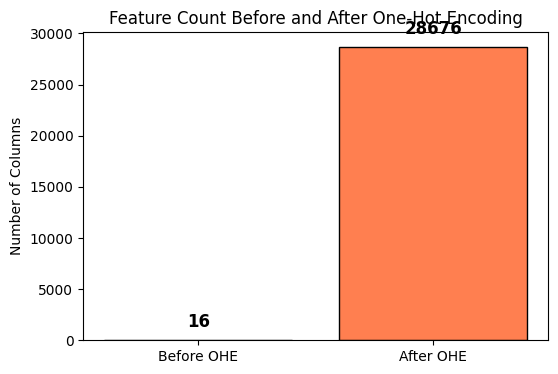

In [ ]:
before_cols = df_iqr.shape[1]

after_cols = ohe_df.shape[1]

plt.figure(figsize=(6, 4))
bars = plt.bar(['Before OHE', 'After OHE'],
               [before_cols, after_cols],
               color=['lightgreen', 'coral'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + (after_cols * 0.03),
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Feature Count Before and After One-Hot Encoding")
plt.ylabel("Number of Columns")
plt.show()


In [ ]:
df=ohe_df.copy()
del ohe_df

5. Scaling the Data: Scale the dataset to ensure all features are on the same
scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
df_scale=df_clean.copy()
scaler = StandardScaler()

df_scale[int_cols] = scaler.fit_transform(df_scale[int_cols])

df_scale.head()


,title,location,department,salary_range,company_profile,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,40000-50000,"We're Food52, and we've created a groundbreaki...",Experience with content management systems a m...,See job description,-0.211707,0.50733,-0.983580,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,40000-50000,"90 Seconds, the worlds Cloud Video Production ...",What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,-0.211707,0.50733,-0.983580,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,40000-50000,Valor Services provides Workforce Solutions th...,Implement pre-commissioning and commissioning ...,See job description,-0.211707,0.50733,-0.983580,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,40000-50000,Our passion for improving quality of life thro...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,-0.211707,0.50733,-0.983580,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",Sales,40000-50000,SpotSource Solutions LLC is a Global Human Cap...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,-0.211707,0.50733,1.016694,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


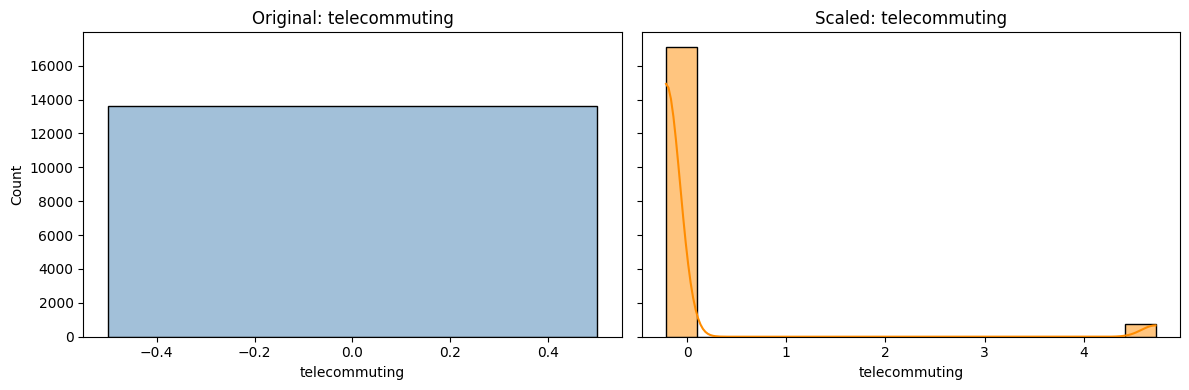

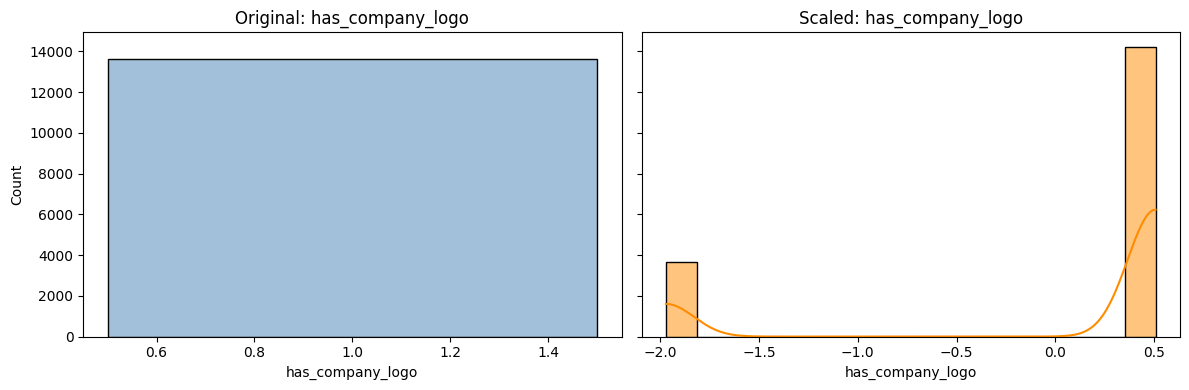

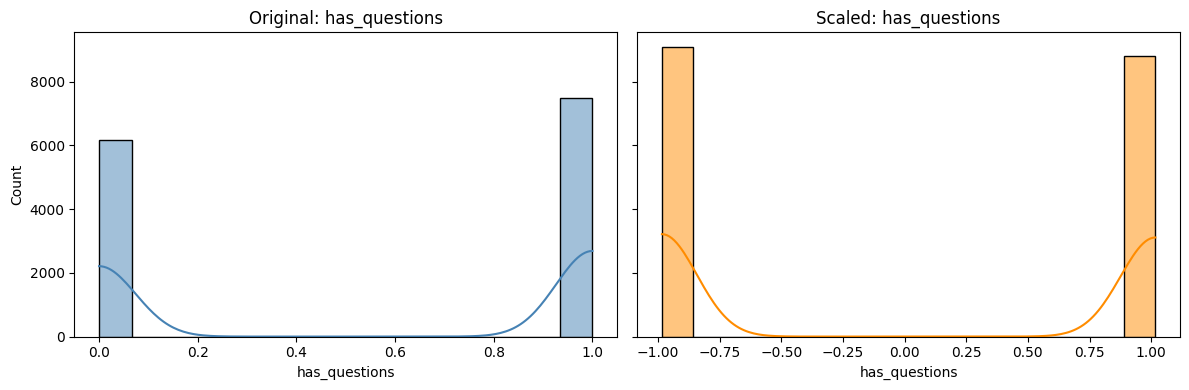

In [ ]:
for col in int_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    sns.histplot(df[col], kde=True, color='steelblue', ax=axes[0])
    axes[0].set_title(f"Original: {col}")
    axes[0].set_xlabel(col)

    sns.histplot(df_scale[col], kde=True, color='darkorange', ax=axes[1])
    axes[1].set_title(f"Scaled: {col}")
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


In [ ]:
df=df_scale.copy()
del df_scale

In [ ]:
df['title'].unique()

array(['Marketing Intern', 'Customer Service - Cloud Video Production',
       'Commissioning Machinery Assistant (CMA)', ...,
       'Senior Financial Analyst (Retail) ',
       'Account Director - Distribution ',
       'Project Cost Control Staff Engineer - Cost Control Exp - TX'],
      dtype=object)

In [ ]:
df['role_type'] = df_clean['title'].apply(
    lambda x: 'Intern' if 'Intern' in x else
              ('Manager' if 'Manager' in x or 'Director' in x else
               ('Executive' if 'Executive' in x or 'CEO' in x else
                ('Developer' if 'Developer' in x or 'Engineer' in x or 'CMA' in x else
                 ('Analyst' if 'Analyst' in x else
                  ('Specialist' if 'Specialist' in x else
                   ('Coordinator' if 'Coordinator' in x else
                    ('Consultant' if 'Consultant' in x  else 'Other'))))))))

In [ ]:
df_clean['location'] = df_clean['location'].fillna(',,')  # makes sure there are 3 parts
df[['country', 'state', 'city']] = df_clean['location'].str.split(',', n=2, expand=True)

In [ ]:
df[['salary_min', 'salary_max']] = df_clean['salary_range'].str.split('-', expand=True)
df['salary_min'] = pd.to_numeric(df['salary_min'], errors='coerce')
df['salary_max'] = pd.to_numeric(df['salary_max'], errors='coerce')

In [ ]:
drop_cols = ['job_id', 'description', 'fraudulent']
drop_cat_cols=['salary_range','location','title']

drop_cols.extend([col for col in df.columns
                  if any(col.startswith(prefix + '_') for prefix in drop_cat_cols)])

In [ ]:
cat_cols=['role_type','country','state','city','salary_min','salary_max']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Model Training

Model trianing - random forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import csr_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=drop_cols, errors='ignore')
y = df['fraudulent']

# Check for missing values
if X.isnull().any().any() or y.isnull().any():
    print("Warning: Missing values detected. Filling with 0.")
    X = X.fillna(0)
    y = y.fillna(0)


X = X.select_dtypes(include=[np.number])
if X.empty:
    raise ValueError("X contains no numeric columns after filtering.")


if not np.issubdtype(y.dtype, np.number) and not y.dtype == 'category':
    print("Warning: y is not numeric or categorical. Attempting to convert.")
    y = pd.factorize(y)[0]


In [ ]:
# feature enginerring

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transforms to standardized form

# PCA to reduce dimensionality
pca = PCA(n_components=0.95, random_state=42) # retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f"Reduced to {X_pca.shape[1]} components")


Reduced to 3 components


In [ ]:
# Split at 80:20 for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict
rf_y_train_pred = rf_model.predict(X_train)
rf_y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)

print("Random Forest - Training Accuracy:", rf_train_accuracy)
print("Random Forest - Testing Accuracy:", rf_test_accuracy)


# Overfitting-Underfitting analysis
# checking differnce in accuracy
if rf_train_accuracy - rf_test_accuracy > 0.1:
    print("Random Forest: Potential Overfitting Detected")
elif rf_train_accuracy < 0.6 and rf_test_accuracy < 0.6:
    print("Random Forest: Potential Underfitting Detected")
else:
    print("Random Forest: Model appears balanced")

# Print confusion matrix and classification report
print("\nRandom Forest - Confusion Matrix:\n", confusion_matrix(y_test, rf_y_test_pred))
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, rf_y_test_pred))
print("Random Forest - Final Test Accuracy:", rf_test_accuracy)


Random Forest - Training Accuracy: 0.8009647651006712
Random Forest - Testing Accuracy: 0.8011744966442953
Random Forest: Model appears balanced

Random Forest - Confusion Matrix:
 [[2758  645]
 [  66  107]]

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      3403
           1       0.14      0.62      0.23       173

    accuracy                           0.80      3576
   macro avg       0.56      0.71      0.56      3576
weighted avg       0.94      0.80      0.85      3576

Random Forest - Final Test Accuracy: 0.8011744966442953


Logical Regression

In [ ]:
# sparse matrix for memory efficiency
X_sparse = csr_matrix(X.astype('float32'))

# Split 80% train, 20% test
X_train_sparse, X_test_sparse, y_train, y_test = train_test_split(X_sparse, y, test_size=0.2, random_state=42,stratify=y)

# Initialize Logistic Regression model with L1 regularization (Lasso)
lr_model_lasso = LogisticRegression(solver='saga', penalty='l1', max_iter=1000,class_weight='balanced')
lr_model_lasso.fit(X_train_sparse, y_train)  # Train model

# Predict
lr_y_train_pred = lr_model_lasso.predict(X_train_sparse)
lr_y_test_pred = lr_model_lasso.predict(X_test_sparse)

# training and testing accuracy
lr_train_accuracy = accuracy_score(y_train, lr_y_train_pred)
lr_test_accuracy = accuracy_score(y_test, lr_y_test_pred)

print("\nLogistic Regression - Training Accuracy:", lr_train_accuracy)
print("Logistic Regression - Testing Accuracy:", lr_test_accuracy)


# To detect overfitting or underfitting
# based on differce in accuracy of test and train
if lr_train_accuracy - lr_test_accuracy > 0.1:
    print("Logistic Regression: Potential Overfitting Detected")
elif lr_train_accuracy < 0.6 and lr_test_accuracy < 0.6:
    print("Logistic Regression: Potential Underfitting Detected")
else:
    print("Logistic Regression: Model appears balanced")

# Print result
print("\nLogistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, lr_y_test_pred))
print("\nLogistic Regression - Classification Report:\n", classification_report(y_test, lr_y_test_pred))
print("Logistic Regression - Final Test Accuracy:", lr_test_accuracy)



Logistic Regression - Training Accuracy: 0.8009647651006712
Logistic Regression - Testing Accuracy: 0.8011744966442953
Logistic Regression: Model appears balanced

Logistic Regression - Confusion Matrix:
 [[2758  645]
 [  66  107]]

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      3403
           1       0.14      0.62      0.23       173

    accuracy                           0.80      3576
   macro avg       0.56      0.71      0.56      3576
weighted avg       0.94      0.80      0.85      3576

Logistic Regression - Final Test Accuracy: 0.8011744966442953


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Gradient Boosting

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Perform Recursive Feature Elimination
# Select top 10 important features using Logistic Regression as base estimator
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
X_rfe = rfe_selector.fit_transform(X.select_dtypes(include=[np.number]), y)  # Only use numerical features

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42,stratify=y)

# Initialize and train Gradient Boosting model
from sklearn.utils import compute_sample_weight

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train, sample_weight=sample_weights)


# Predictions
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nGradient Boosting - Training Accuracy:", train_accuracy)
print("Gradient Boosting - Testing Accuracy:", test_accuracy)

# Overfitting/Underfitting Check
if train_accuracy - test_accuracy > 0.1:
    print("Gradient Boosting: Potential Overfitting Detected")
elif train_accuracy < 0.6 and test_accuracy < 0.6:
    print("Gradient Boosting: Potential Underfitting Detected")
else:
    print("Gradient Boosting: Model appears balanced")

print("\nGradient Boosting - Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nGradient Boosting - Classification Report:\n", classification_report(y_test, y_test_pred))
print("Gradient Boosting - Final Test Accuracy:", test_accuracy)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=3. There will be no feature selection and all features will be kept.
  warnings.warn(



Gradient Boosting - Training Accuracy: 0.8009647651006712
Gradient Boosting - Testing Accuracy: 0.8011744966442953
Gradient Boosting: Model appears balanced

Gradient Boosting - Confusion Matrix:
 [[2758  645]
 [  66  107]]

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      3403
           1       0.14      0.62      0.23       173

    accuracy                           0.80      3576
   macro avg       0.56      0.71      0.56      3576
weighted avg       0.94      0.80      0.85      3576

Gradient Boosting - Final Test Accuracy: 0.8011744966442953


Visualization of result

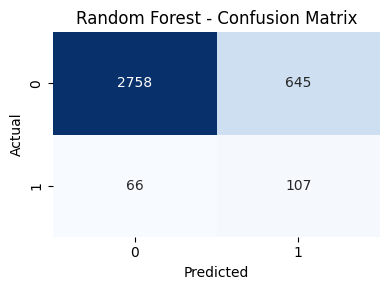

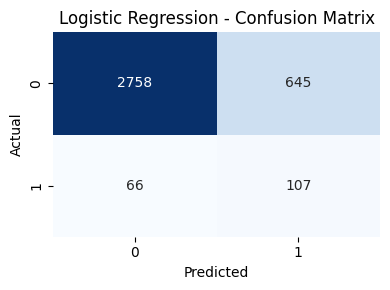

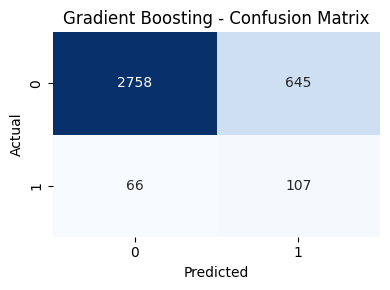

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Call for each model
plot_conf_matrix(y_test, rf_y_test_pred, title="Random Forest - Confusion Matrix")
plot_conf_matrix(y_test, lr_y_test_pred, title="Logistic Regression - Confusion Matrix")
plot_conf_matrix(y_test, y_test_pred, title="Gradient Boosting - Confusion Matrix")


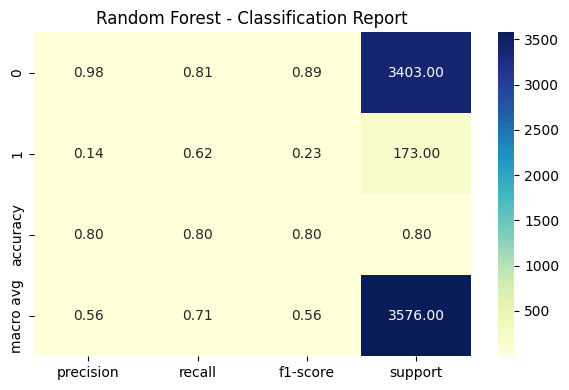

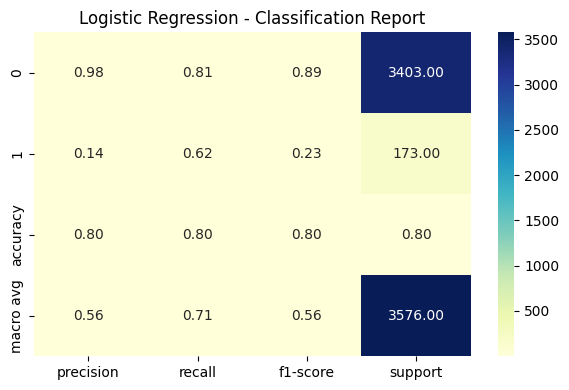

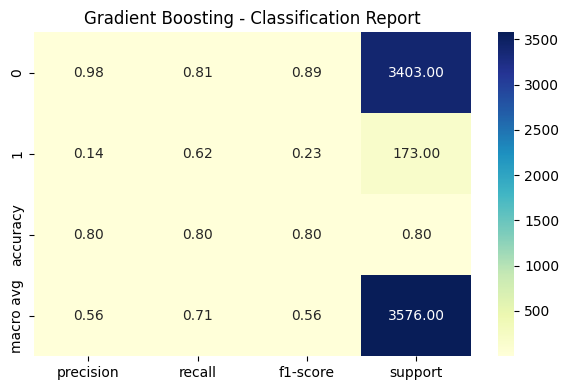

In [ ]:
def plot_classification_report(y_true, y_pred, title="Classification Report"):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose().iloc[:-1, :]  # Exclude 'accuracy'
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_report, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Call for each model
plot_classification_report(y_test, rf_y_test_pred, title="Random Forest - Classification Report")
plot_classification_report(y_test, lr_y_test_pred, title="Logistic Regression - Classification Report")
plot_classification_report(y_test, y_test_pred, title="Gradient Boosting - Classification Report")


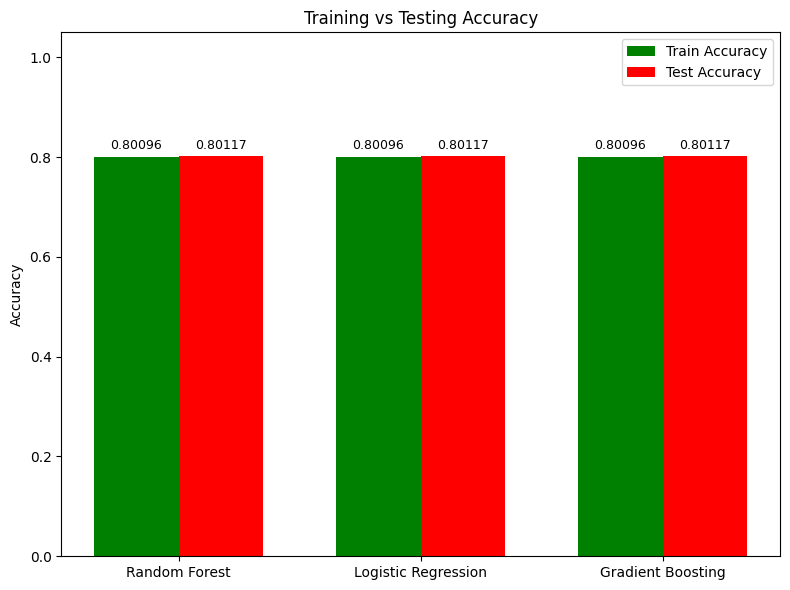

In [ ]:
train_accuracies = [rf_train_accuracy, lr_train_accuracy, train_accuracy]
test_accuracies = [rf_test_accuracy, lr_test_accuracy, test_accuracy]
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='green')
bars2 = plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='red')

for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.5f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.5f}', ha='center', va='bottom', fontsize=9)

plt.xticks(x, models)
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

